Import Data

In [54]:
# Importing os for getting path names for data
import os
# Importing pandas 
import pandas as pd

In [55]:
data_path = os.path.join('data','zippedData')
files = os.listdir(data_path)

In [56]:
import_paths = [os.path.join(data_path,file) for file in files]

In [57]:
import_paths

['data/zippedData/imdb.title.crew.csv.gz',
 'data/zippedData/tmdb.movies.csv.gz',
 'data/zippedData/imdb.title.akas.csv.gz',
 'data/zippedData/imdb.title.ratings.csv.gz',
 'data/zippedData/imdb.name.basics.csv.gz',
 'data/zippedData/rt.reviews.tsv.gz',
 'data/zippedData/imdb.title.basics.csv.gz',
 'data/zippedData/rt.movie_info.tsv.gz',
 'data/zippedData/tn.movie_budgets.csv.gz',
 'data/zippedData/bom.movie_gross.csv.gz',
 'data/zippedData/imdb.title.principals.csv.gz']

In [58]:
data = {}
for path in import_paths:
    try:
        df = pd.read_csv(path) #this will fail on the .tsv
    except:
        df = pd.read_csv(path,delimiter='\t', encoding='unicode_escape')
    data[path.split('/')[-1]] = df

# Looking into a new idea

In [95]:
data['imdb.title.basics.csv.gz']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [98]:
data

{'imdb.title.crew.csv.gz':            tconst                      directors              writers
 0       tt0285252                      nm0899854            nm0899854
 1       tt0438973                            NaN  nm0175726,nm1802864
 2       tt0462036                      nm1940585            nm1940585
 3       tt0835418                      nm0151540  nm0310087,nm0841532
 4       tt0878654  nm0089502,nm2291498,nm2292011            nm0284943
 ...           ...                            ...                  ...
 146139  tt8999974                     nm10122357           nm10122357
 146140  tt9001390                      nm6711477            nm6711477
 146141  tt9001494          nm10123242,nm10123248                  NaN
 146142  tt9004986                      nm4993825            nm4993825
 146143  tt9010172                            NaN            nm8352242
 
 [146144 rows x 3 columns],
 'tmdb.movies.csv.gz':        Unnamed: 0            genre_ids      id original_language  \
 

data['rt.movie_info.tsv.gz'] - has movie ids that could be used to suplement other dataset

data['tn.movie_budgets.csv.gz'] - has domestic and worldwide gross

In [101]:
data['rt.movie_info.tsv.gz'].shape

(1560, 12)

# All movie data sets imported in to variable 'data'

## (1) Looking at the idea of comparing the gross income from domestic and foreign based on the genre that movie has been classified as from bom.movie_gross.csv.gz'

In [360]:
file_rename_list = ['writer_director', #imdb.title.crew.csv.gz
                   'move_info',#tmdb.movies.csv.gz
                   'global_title',#imdb.title.akas.csv.gz
                   'rating_with_votes',#imdb.title.ratings.csv.gz'
                   'worked_in_film',#imdb.name.basics.csv.gz
                   'rotten_reviews',#rt.reviews.tsv.gz
                   'movie_basic_info',#imdb.title.basics.csv.gz
                   'rotten_movie_info',#rt.movie_info.tsv.gz
                   'budget_tn',#tn.movie_budgets.csv.gz
                   'boxoffice_bom',#bom.movie_gross.csv.gz
                   'character_title',#imdb.title.principals.csv.gz
                   ]

In [361]:
#getting movie title and genre from the df
id_df = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]
#changing column title to be the same with other df
id_df.rename(columns={'original_title':'title'},inplace=True)

In [362]:
id_df

,genre_ids,title
0,"[12, 14, 10751]",Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",How to Train Your Dragon
2,"[12, 28, 878]",Iron Man 2
3,"[16, 35, 10751]",Toy Story
4,"[28, 878, 12]",Inception
...,...,...
26512,"[27, 18]",Laboratory Conditions
26513,"[18, 53]",_EXHIBIT_84xxx_
26514,"[14, 28, 12]",The Last One
26515,"[10751, 12, 28]",Trailer Made


In [363]:
#getting the title and gross into sep df
money_df = data['bom.movie_gross.csv.gz'].loc[:,['title','domestic_gross']]

In [364]:
money_df

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3382,The Quake,6200.0
3383,Edward II (2018 re-release),4800.0
3384,El Pacto,2500.0
3385,The Swan,2400.0


In [365]:
#merging the movie info with the gross income info
money_id_df = money_df.merge(id_df,how='left',on='title') 

In [366]:
money_id_df.tail()

,title,domestic_gross,genre_ids
3718,The Quake,6200.0,NaN
3719,Edward II (2018 re-release),4800.0,NaN
3720,El Pacto,2500.0,NaN
3721,The Swan,2400.0,NaN
3722,An Actor Prepares,1700.0,"[35, 18]"


In [367]:
money_id_df = money_id_df.sort_values(by='domestic_gross',ascending=False)

In [368]:
money_id_df.isna().sum()

title                0
domestic_gross      32
genre_ids         1443
dtype: int64

In [369]:
testing_drops = money_id_df

If I drop rows based off of not having ids we end with 1900 rows 

In [370]:
testing_drops.dropna(subset=['genre_ids']).isna().sum()

title              0
domestic_gross    13
genre_ids          0
dtype: int64

### At the point where we have df with the 1) title, 2) genre ids, and 3) total gross 
Size = 3723 x 5

isna:
* title                0
* domestic_gross      32
* foreign_gross     1486
* genre_ids         1443
* total_gross       1518

In [371]:
money_id_df.drop_duplicates(subset='title',inplace = True)

In [372]:
money_id_df.isna().shape

(3386, 3)

After dropping all duplicates from Title we end up with a shape of 3386 , 5

In [373]:
money_id_df

,title,domestic_gross,genre_ids
1954,Star Wars: The Force Awakens,936700000.0,"[28, 12, 878, 14]"
3393,Black Panther,700100000.0,"[28, 12, 14, 878]"
3391,Avengers: Infinity War,678800000.0,"[12, 28, 14]"
1955,Jurassic World,652300000.0,"[28, 12, 878, 53]"
751,Marvel's The Avengers,623400000.0,NaN
...,...,...,...
2086,Surprise - Journey To The West,NaN,NaN
2576,Finding Mr. Right 2,NaN,NaN
2666,Solace,NaN,[]
2818,Viral,NaN,"[18, 27, 878]"


In [374]:
genre_id_to_string = {28:'action',
                      16:'animated',
                      99:'documentary',
                      18:'drama',
                      10751:'family',
                      14:'fantasy',
                      36:'history',
                      35:'comedy',
                      10752:'war',
                      80:'crime',
                      10402:'music',
                      9648:'mystery',
                      10749:'romance',
                      878:'sci-fi',
                      27:'horror',
                      10770:'TV-movie',
                      53:'thriller',
                      37:'western',
                      12:'adventure'}

In [375]:
money_id_df.dropna(subset=['genre_ids'],inplace=True)

In [376]:
def convert_id_to_name(id_list):
    id_list = id_list[1:-1].replace(',','').split()
    for id in enumerate(id_list):
        id_list[id[0]] = genre_id_to_string[int(id[1])]
    return(id_list)


In [377]:
money_id_df.genre_ids = money_id_df.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

In [378]:
money_id_df.dropna(subset=['domestic_gross'],inplace=True)

In [379]:
counter_dict = {}
for item in money_id_df.iterrows():
    ids = list(item[1])[-1]
    money = list(item[1])[-2]
    if ids != 'nan':
        for id in ids:
            if id in counter_dict.keys():
                counter_dict[id] += money
            else:
                counter_dict[id] = money

In [380]:
import matplotlib.pyplot as plt
%matplotlib inline

[35949781896.0, 34938651896.0, 28926547394.0, 21879972494.0, 19359980899.0, 16738328499.0, 16549441798.0, 15816020998.0, 12396537398.0, 8211030900.0]


Text(0, 0.5, 'Gross Domestic Box Office')

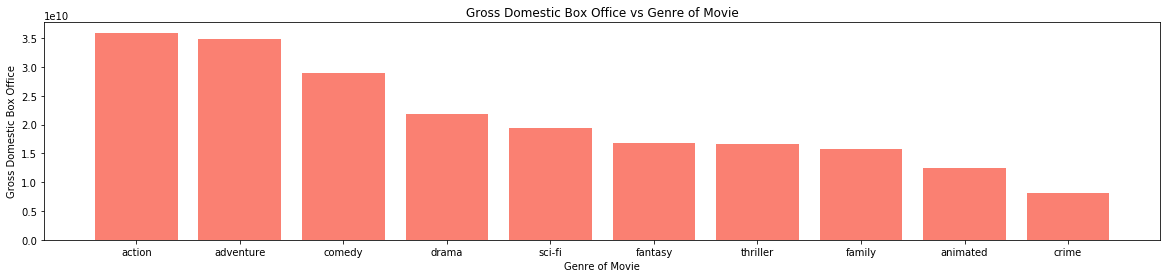

In [381]:
x = []
y = []
counter = 0
for item in sorted(counter_dict, key=counter_dict.get, reverse=True):
    if counter == 10:
        break
    counter+=1
    x.append(item)
    y.append(counter_dict[item])
print(y)
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='salmon')
ax.set_title('Gross Domestic Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Domestic Box Office')


## (2) Looking at something else

In [172]:
for item in data:
    print(item)

imdb.title.crew.csv.gz
tmdb.movies.csv.gz
imdb.title.akas.csv.gz
imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz
rt.reviews.tsv.gz
imdb.title.basics.csv.gz
rt.movie_info.tsv.gz
tn.movie_budgets.csv.gz
bom.movie_gross.csv.gz
imdb.title.principals.csv.gz


In [242]:
df = data['rt.reviews.tsv.gz']
df['fresh_number'] = df['fresh'].apply(lambda x: 0 if x=='rotten' else 1)
fresh_perc = df.groupby('id')['fresh_number'].mean()
fresh_perc

id
3       0.631902
5       0.782609
6       0.561404
8       0.746667
10      0.462963
          ...   
1996    0.671329
1997    0.357143
1998    1.000000
1999    0.586957
2000    0.473684
Name: fresh_number, Length: 1135, dtype: float64

In [253]:
data['tn.movie_budgets.csv.gz']

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [342]:
test_money = data['tn.movie_budgets.csv.gz']
test_money.rename(columns={'movie':'title'},inplace=True)

In [343]:
test_movies = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]
test_movies.rename(columns={'original_title':'title'},inplace=True)

In [344]:
test_combo = test_movies.merge(test_money,how='left',on='title') 

In [345]:
test_combo = test_combo.loc[:,['title','genre_ids','domestic_gross','worldwide_gross']]

In [346]:
test_combo.dropna(subset=['domestic_gross'],inplace=True)

In [347]:
def clean_money(money):
    money = money.replace('$','')
    return float(money.replace(',',''))

In [348]:
test_combo.domestic_gross = test_combo.domestic_gross.apply(lambda x: clean_money(x))
test_combo.worldwide_gross = test_combo.worldwide_gross.apply(lambda x: clean_money(x))

In [349]:
test_combo['total_gross'] = test_combo.domestic_gross + test_combo.worldwide_gross

In [350]:
test_combo

,title,genre_ids,domestic_gross,worldwide_gross,total_gross
1,How to Train Your Dragon,"[14, 12, 16, 10751]",217581232.0,494870992.0,7.124522e+08
2,Iron Man 2,"[12, 28, 878]",312433331.0,621156389.0,9.335897e+08
3,Toy Story,"[16, 35, 10751]",191796233.0,364545516.0,5.563417e+08
4,Inception,"[28, 878, 12]",292576195.0,835524642.0,1.128101e+09
5,Percy Jackson & the Olympians: The Lightning T...,"[12, 14, 10751]",88768303.0,223050874.0,3.118192e+08
...,...,...,...,...,...
26419,The Judge,"[99, 99]",47119388.0,76119388.0,1.232388e+08
26493,Wolf,[27],65011757.0,131011757.0,1.960235e+08
26505,The Box,[10402],15051977.0,34356760.0,4.940874e+07
26586,Eden,[],0.0,0.0,0.000000e+00


In [351]:
test_combo.genre_ids = test_combo.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

In [352]:
test_combo

,title,genre_ids,domestic_gross,worldwide_gross,total_gross
1,How to Train Your Dragon,"[fantasy, adventure, animated, family]",217581232.0,494870992.0,7.124522e+08
2,Iron Man 2,"[adventure, action, sci-fi]",312433331.0,621156389.0,9.335897e+08
3,Toy Story,"[animated, comedy, family]",191796233.0,364545516.0,5.563417e+08
4,Inception,"[action, sci-fi, adventure]",292576195.0,835524642.0,1.128101e+09
5,Percy Jackson & the Olympians: The Lightning T...,"[adventure, fantasy, family]",88768303.0,223050874.0,3.118192e+08
...,...,...,...,...,...
26419,The Judge,"[documentary, documentary]",47119388.0,76119388.0,1.232388e+08
26493,Wolf,[horror],65011757.0,131011757.0,1.960235e+08
26505,The Box,[music],15051977.0,34356760.0,4.940874e+07
26586,Eden,[],0.0,0.0,0.000000e+00


In [356]:
counter_dict_test = {}
for item in test_combo.iterrows():
    ids = list(item[1])[1]
    money = list(item[1])[-1]
    if ids != 'nan':
        for id in ids:
            if id in counter_dict_test.keys():
                counter_dict_test[id] += money
            else:
                counter_dict_test[id] = money

In [357]:
counter_dict_test

{'fantasy': 91152954854.0,
 'adventure': 167315205573.0,
 'animated': 68022721390.0,
 'family': 88292367880.0,
 'action': 174235422404.0,
 'sci-fi': 91746711071.0,
 'comedy': 117435053879.0,
 'thriller': 81319220369.0,
 'horror': 28522395804.0,
 'crime': 38696399654.0,
 'drama': 111215528644.0,
 'romance': 34150756726.0,
 'mystery': 19246748162.0,
 'history': 8511241059.0,
 'western': 4182735166.0,
 'war': 9171608988.0,
 'documentary': 6290849968.0,
 'music': 7430250719.0,
 'TV-movie': 877754533.0}

In [358]:
import matplotlib.pyplot as plt
%matplotlib inline

[35949781896.0, 34938651896.0, 28926547394.0, 21879972494.0, 19359980899.0, 16738328499.0, 15816020998.0, 16549441798.0, 12396537398.0, 8211030900.0]


Text(0, 0.5, 'Gross Domestic Box Office')

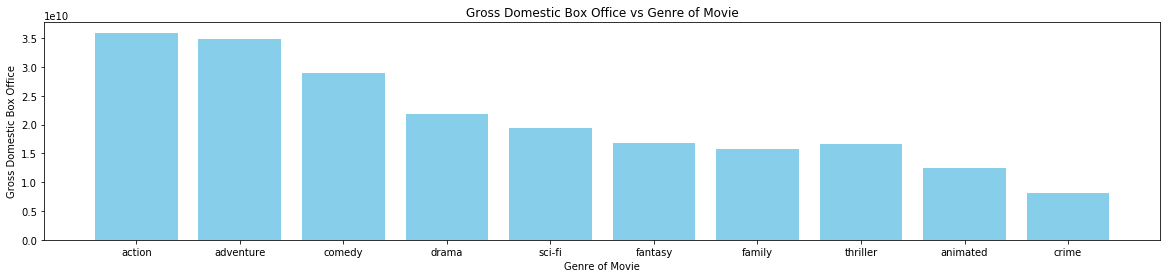

In [385]:
x = []
y = []
counter = 0
for item in sorted(counter_dict_test, key=counter_dict_test.get, reverse=True):
    if counter == 10:
        break
    counter+=1
    x.append(item)
    y.append(counter_dict[item])
print(y)
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='skyblue')
ax.set_title('Gross Domestic Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Domestic Box Office')
